In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('googleplaystore.csv') #csv formatındaki verisetimizi okuyoruz.


In [4]:
df.head() #verisetimizin ilk satırların bakalım.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
df.columns #verisetimizdeki sütun isimlerini görelim

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.columns = df.columns.str.replace(" ","_") #Sütun isimleri içerisindeki "düzensiz" yerleri '_' ifadesi ile dolduralım.

In [8]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [9]:
df.shape #verisetimizdeki satır ve sütun sayıları ekrana yazıldı

(10841, 13)

In [10]:
#10841 satır ve 13 sütun bulunuyor.
#Veri analizinde satırlara örneklem ve sütunlara öznitelik denir.
#Şimdi sütunların veri tiplerini kontrol edelim

In [11]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

In [12]:
#Gözüktüğü gibi sadece 'Rating' sütunu float tipinde. Fakat Size ve Install sütunları sayısal tipte olmalıdır.

In [13]:
#Şimdi eksik verileri ele alalım
#Eksik verileri ele almak veri analizinin önemli aşamalarından biridir
#O kadar önemlidir ki sadece bu eksik verilerin nasıl ele alınmasına dair tezler ve fikirler mevcuttur.

In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [15]:
#Gözüktüğü gibi 'Rating' sütununda 1471, 'Type' sütununda 1, 
#'Content_Rating' sütununda 1,'Current_Ver sütununda 8've 'Androi_Ver'sütununda da 3 tane eksik veri olduğu gözükmektedir.

In [16]:
#Eksik verileri seaborn kütüphanesi ile görselleştirebiliriz

In [17]:
import seaborn as sns

In [18]:
sns.set_theme()
sns.set(rc={"figure.dpi":400,"figure.figsize":(12,9)}) #grafik kalitesi ve grafik boyutunu ayarlayalım

<AxesSubplot:>

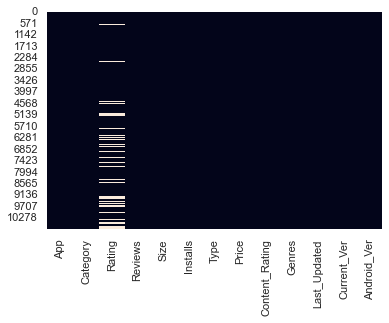

In [19]:
sns.heatmap(df.isnull(), cbar=False) 

In [20]:
#Bu kısımda 'Rating' sütunundaki eksik verilerin olduğu açıkça bellidir. Current_Ver sütunundaki birkaç eksi veri de gözüküyor.

In [21]:
#Bu eksik verileri çeşitli şekilde doldurulabilir.
#En kolayı eksik veri içeren satırları kaldırmak fakat bu yaklaşım veri kaybına yol açacağı için tavsiye edilmez.
#Genellikle eksik verilerin yerine sütunun ortalaması veya medyanı yazılır 
#Verisetinde aykırı değerler olabileceğinden ortalama yerine medyan kullanılır, çünkü medyan aykırı verilere karşı daya dayanakıldıır.

In [22]:
rating_median=df["Rating"].median()
rating_median

4.3

In [23]:
#Böylece 'Rating' sütununun medyan değerini bulmuş olduk ardından bu veriyi eksik verilerin yerine koyabiliriz.

In [24]:
df["Rating"].fillna(rating_median, inplace=True)

In [25]:
#Böylece 'Rating' sütunundaki eksik verileri doldurmuş olduk.
#Diğer sütundaki eksik veriler az olduğu için 'dropna' komutuyla kaldıralım

In [26]:
df.dropna(inplace=True)

In [27]:
#Artık veri setimizde eksik veri kalmadı.

In [28]:
df.isnull().sum().sum() #Verisetimizde hiçbir eksik veri yok.

0

In [29]:
df.info() #Verisetimiz hakkında özet bilgiler için

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [30]:
#'Reviews' - 'Size' vb. komutların object tipinden sayısal tipe çevrilmesi gerekiyor.
#'Reviews' sütunuyla başlayalınm

In [31]:
df["Reviews"].describe() #

count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

In [32]:
#Gözüktüğü gibi bu sütunda toplam 10829 değer, tek değer sayısı5999, en çok değer0 dan oluşuyo ve
#bu 0 lar 594 defa tekrar etmiş.

In [33]:
df["Reviews"] = df["Reviews"].astype("int64") #Sütunu sayısala çevirip tekrardan kendisine atayarak işlemi tamamlamış oluyoruz.

In [34]:
df["Reviews"].describe()

count    1.082900e+04
mean     4.446018e+05
std      2.929213e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.100000e+03
75%      5.481500e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [35]:
df["Reviews"].describe().round()

count       10829.0
mean       444602.0
std       2929213.0
min             0.0
25%            38.0
50%          2100.0
75%         54815.0
max      78158306.0
Name: Reviews, dtype: float64

In [36]:
#Görüldüğü gibi sayısala çevirdiğimiz için ort,standart sapma gibi özet istatistikler ortaya çıktı.
#dikkat edersek verinin ortalaması 444602 , ortanca değer 2100 veri ortalamalası > medyan
#standart sapma değeri oldukça yüksek ver maksimum dğeer sayısı ortalama değerden oldukça yüksek
#bu özet istatistikler bu sütunda aykırı değerlerin olduğunu gösterir

In [37]:
df["Size"].unique() #Size sütunu uygulamanın boyutunu gösteriyor.

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [38]:
len(df["Size"].unique()) #Bu tek değerlerin sayısını 'len' metoduyla görebiliriz

457

In [39]:
#Bu değerlerdeki M harfi megabyte şeklinde k harfi ise kilobyte şeklinde tasvir edilmiştir.
#Ve ayrıca dikkat edersek içerisinde bir tane de metinsel ifade bulunmaktadır.
#Öncelikle bu değerlerdeki M ve k harflerini kaldıralım. Replace metodunu kullanabiliriz.

In [40]:
df["Size"].replace("M","",regex=True, inplace=True) #rEGULAR İFADE KULLANMAK İÇİN TRUE
df["Size"].replace("k","",regex=True, inplace=True) 

In [41]:
df["Size"].unique() #verisetindeki m ve k harfleri kaldırıldı fakat 'Varies with device' metni hala duruyor.

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '79', '8.4', '118', '44', '695', '1.6',
       '6.2', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49',
       '77', '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36',

In [42]:
#Burada yapcağım işlem metin değerini kaldırıp diğer değerleri sayısala çevirip değerlerin medyanını bulmak.
#Öncelikle bu sütunun medyan değerini bulalım.

In [43]:
size_median = df[df["Size"]!="Varies with device"]["Size"].astype(float).median() #sayısala çevirmek ondalık tip --> float
size_median

15.0

In [44]:
#şimdi metin yerine medyan değerini atayalım
df["Size"].replace("Varies with device", size_median, inplace=True)

In [45]:
df.Size = pd.to_numeric(df.Size) #Artık size sütununu sayısala çevirebiliriz

In [46]:
#Böylece 'Size' sütunundaki stringleri kaldırdık ve sayısala çevirmiş olduk.

In [47]:
df.Size.head() #Size sütunundaki değerleri ele alalım değerler sayısala dönüştü ve veritipi float olmuş vaziyette.

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [48]:
df.Size.describe().round() #Bu sütunun özet istatistikleri de aşağıdaki gibidir.

count    10829.0
mean        34.0
std         91.0
min          1.0
25%          7.0
50%         15.0
75%         28.0
max       1020.0
Name: Size, dtype: float64

In [49]:
df["Installs"].unique() #Gözüktüğü gibi yükleme sayılarının yanında + sembolleri var ve rakamlar arası virgüller yer alıyor
#Hem + hem de , 'leri kaldıralım. Bu işlemi yapabilmek için lambda fonksiyonu kullanmamız gerekiyor.

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [50]:
df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x))

In [51]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [52]:
#Yapılan değişikliklerden sonra dikkat edersek sayılar içerisindeki virgüller ve + işaretleri kaldırıldı.
#ve veri tipi int olmuş vaziyette.

In [53]:
#ŞİMDİ 'PRİCE' sütununun inceleyelim.

In [54]:
df["Price"].unique() #Dikkat edersek fiyatların önünde dolar sembolü var

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [55]:
df.Price = df.Price.apply(lambda x:x.replace("$",""))

In [56]:
df.Price = df.Price.apply(lambda x:float(x))

In [57]:
df["Price"].unique() #Gözüktüğü gibi verisetinden dolar sembolleri kaldırıldı ve floata çevrildi.

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [58]:
len(df["Genres"].unique()) #119 tane var

119

In [59]:
df["Genres"].head(10) 

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
5                 Art & Design
6                 Art & Design
7                 Art & Design
8                 Art & Design
9      Art & Design;Creativity
Name: Genres, dtype: object

In [60]:
#Bazı satırlarda noktalı virgl var ve ilk değer türü ikinci değer alt kategoriyi gösteriyor.
#Önce bu iki ifadeyi ayırıp sadece genre ifadesini allaım
df["Genres"] = df["Genres"].str.split(";").str[0] #; ile ayıracağımı söyledim

In [61]:
len(df["Genres"].unique())  #unique değer daha önce 119 ken şuan 48 e indi.

48

In [62]:
df["Genres"].unique()


array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [63]:
#Bu sütundaki grupların sayısını bulalım
df["Genres"].value_counts()

Tools                      841
Entertainment              666
Education                  644
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          233
Simulation                 218
Video Players & Editors    178
Puzzle                     166
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
House & 

In [64]:
df["Last_Updated"].head() #En son bu sütunu ele alabiliriz

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

In [65]:
#Gözüktüğü gibi bu sütunlarda tarihler var fakat bu sütun obje tipinde
#Pandasta datetime adında veri tipi var. Yani tarih tipi. Bu sütunu tarih tipine çeviriyor
df["Last_Updated"] = pd.to_datetime (df["Last_Updated"])

In [66]:
df.head() 
#Verisetinin son haline baktığımızda last_uptade kısmında tarih tipini çevrim yapıldığı gözükmektedir.
#Diğer sütunlardaki gereksiz semboller kaldırıldı.
#Sütunların veritipleri ayarlandı.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


In [67]:
df.dtypes #Veri temizleme işlemimiz bitmiştir. Gözüktüğü gibi istediğimiz değişiklikleri yapıp veriyi analize hazır hale getirdik.

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content_Rating            object
Genres                    object
Last_Updated      datetime64[ns]
Current_Ver               object
Android_Ver               object
dtype: object

<AxesSubplot:>

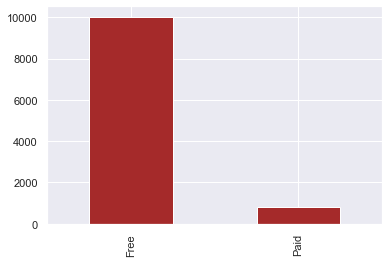

In [68]:
#Play store'dan indirilen ücretli ve ücretsiz uygulamaların sayısına göz atalım.
df["Type"].value_counts().plot(kind="bar",color = "brown")

In [69]:
#Görüldüğü gibi ücretsiz uygulamaların indirilmesi ücretlilere göre daha fazla gözüküyor.
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ücretli ve Ücretsiz Uygulamaların Reyting Karşılaştırması')

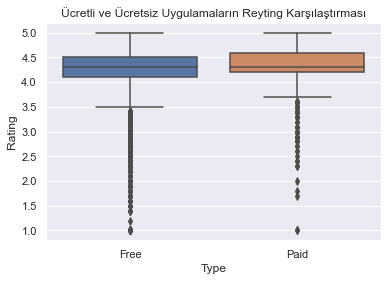

In [70]:
#Ücretli ve ücretsiz uygulamalarının reytinglerinin karşılaştırmasını ele alırsak.
sns.boxplot(x = "Type", y = "Rating", data = df)
plt.title("Ücretli ve Ücretsiz Uygulamaların Reyting Karşılaştırması")

In [71]:
#Kutu grafiğinde kutular verinin yüzde 25 ile yüzde 75 ini gösterir
#ortadaki çizgi medyan ifadeler
#üst ve alt çizgilere whiskers yani bıyık denir ve bunlar da verinin alt ve üst çeyreklerini gösterir.
#1.Kutu ücretsiz uygulamaları 2.kutu ücretli uygulamaları gösteriyor.
#Ücretli uygulamların reyting değeri daha fazladır.
#Buradaki noktoları aykırı değerler olarak düşünebiliriz.Ayrıca kutu g aykırı dğeerleri görmek için de kullanılır.

In [72]:
#Şimdi grafik çizdirmek için çok fazla kullanılıan matplotlib kütüphanesini import edelim
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sayılarıyla Birlikte İçerik Reytingleri')

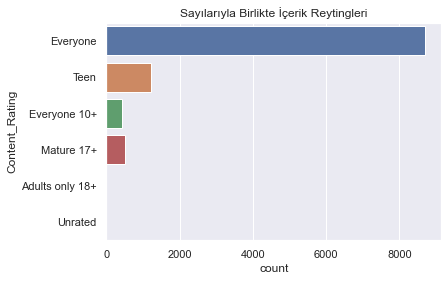

In [73]:
sns.countplot(y = "Content_Rating", data = df)
plt.title("Sayılarıyla Birlikte İçerik Reytingleri")

In [74]:
#Uygulamaların en fazla hitap ettiği kesim yani herkes
#Sonra gençlere sonra 10+ üstü insanlara.

#Uygulamaların bu Gruplara göre reytinglerini bulmak istersek

<AxesSubplot:xlabel='Content_Rating', ylabel='Rating'>

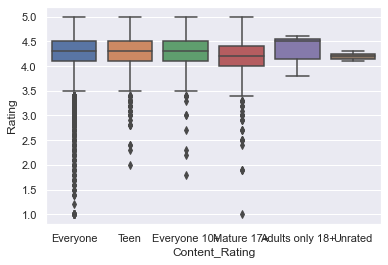

In [75]:
sns.boxplot(x = "Content_Rating", y = "Rating" , data = df)

Text(0.5, 1.0, 'Kategorilerin Sayısı')

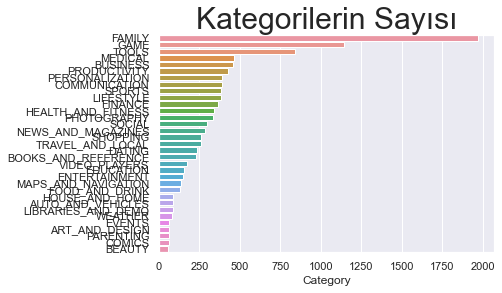

In [76]:
say_kat = df["Category"].value_counts()
sns.barplot(x = say_kat, y =say_kat.index, data =df)
plt.title("Kategorilerin Sayısı", size=30)

<AxesSubplot:xlabel='Price', ylabel='Category'>

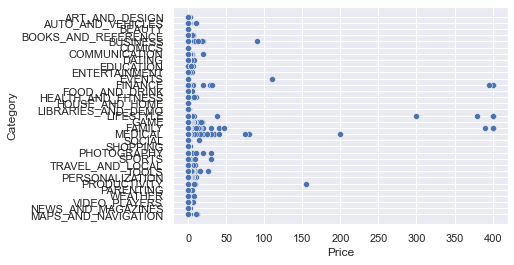

In [77]:
#Hadi en fazla para verilen kategorilere bakalım
sns.scatterplot(data = df, y = "Category", x ="Price")

In [78]:
#Dikkat edilirse en yüksek para verilen uygulamalar FINANCE,LİFESTYLE,VE FAMİLY olduğu grafikte açık şekilde gözüküyor.

C:\Users\Batuhan Aslan\AppData\Local\Temp\ipykernel_2760\1137845361.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True, linewidths=.5, fmt=".2f")


<AxesSubplot:>

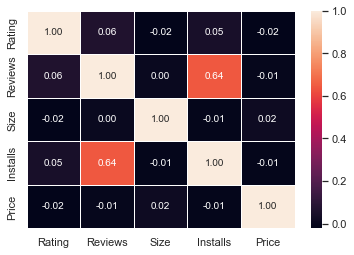

In [79]:
sns.heatmap(df.corr(), annot =True, linewidths=.5, fmt=".2f")

In [80]:
#Isı grafiği yukarıda gözüktüğü gibidir.
#Renkler açıklaştıkça iki değişken arasında ilişki artıyor.
#En fazla 0.64 ile Installs ve Reviews arasında ilişki var. Mantıken bir uygulama ne kadar çok indirilmişse yorum sayısı o kadar fazladır.


<AxesSubplot:xlabel='Rating', ylabel='Count'>

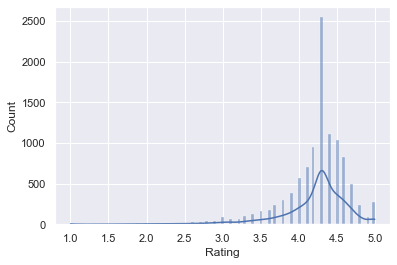

In [81]:
#Reyting dağılımına göz atabiliriz
sns.histplot(df["Rating"], kde = True)

In [82]:
#En çok puan 4.3 civarında olduğu gözüküyor.

In [83]:
df.corr() #Burada sayısal değerler arasındaki ilişkiye matematiksel açıdan bakabiliyoruz.

#KORELASYON MATRİSİNİN SAYISAL HALİ

C:\Users\Batuhan Aslan\AppData\Local\Temp\ipykernel_2760\2305524217.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #Burada sayısal değerler arasındaki ilişkiye matematiksel açıdan bakabiliyoruz.


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063172,-0.021997,0.045495,-0.019330
Reviews,0.063172,1.000000,0.003765,0.643112,-0.009674
Size,-0.021997,0.003765,1.000000,-0.012574,0.016526
Installs,0.045495,0.643112,-0.012574,1.000000,-0.011698
Price,-0.019330,-0.009674,0.016526,-0.011698,1.000000


C:\Users\Batuhan Aslan\AppData\Local\Temp\ipykernel_2760\1459931047.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()) #Yineburada da değerleri gözükmediği halde hangi iki kavram arasında nasıl bir ilişki var


<AxesSubplot:>

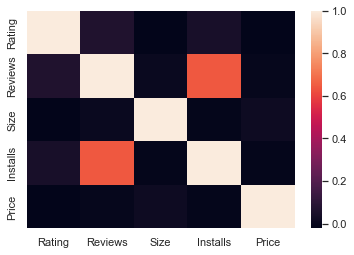

In [84]:
sns.heatmap(df.corr()) #Yineburada da değerleri gözükmediği halde hangi iki kavram arasında nasıl bir ilişki var
#bunu anlayabiliyoruz.

#KORELASYON MATRİSİNİN ISI GRAFİĞİNDEKİ HALİ